In [1]:
# -*- coding: utf-8 -*-

from math import sqrt
from math import sin
from math import cos
from math import tan
from math import acos
from math import fabs
from math import exp
from math import log
from math import log10
import numpy as np 
import math as math 
import matplotlib.pyplot as plt 

import scipy
from scipy import special
from scipy.integrate import solve_ivp
from scipy.integrate import odeint
from scipy.integrate import LSODA

from scipy import optimize
from scipy.optimize import curve_fit
from scipy import integrate

In [2]:
# useful notations
Mbh = 2e33*6.5e9
G = 6.67e-8
c = 3e10
rg = G*Mbh/c**2
D = 16.4e6*3.08e18

In [ ]:
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! this part is about calculation of metric functions !!!!!!!!!!!!!!!!!!!!!!!!!!!!
# function for field equations

def equations(y,t):
    ksi = t
    dphi = -y[3]/ksi**2
    dnu = -(ksi-(y[3]*(8*y[0]+3*y[3]/ksi)/(4*y[0]*(1+y[0]))+ksi)*(1-
            ksi*y[1]))/(ksi**2*(1-ksi*y[1])*(1+y[3]/(2*ksi*(1+y[0]))))
    dMeff = (((1-y[1]*ksi)*(3*y[3]**2/(4*y[0])-2*ksi*y[3])+
            y[1]*ksi**3*(1+y[0]))/(ksi**4*(1+y[0]+y[3]/(2*ksi)))-y[1]/ksi+(1-
            y[1]*ksi)/(ksi**2*(1+y[0]+y[3]/(2*ksi)))*(y[3]*y[1]/(2*(1-ksi*y[1]))-y[3]/2*dnu-
            y[3]**2/(2*y[0]*ksi**2)+2*y[3]/ksi))/(1-y[3]/(2*ksi*(1+y[0]+y[3]/(2*ksi))))
    dU = ((y[3]/2*(ksi*dMeff+y[1]))/(1-ksi*y[1])-
           y[3]*dnu/2-y[3]**2/(ksi**2*2*y[0])+2*y[3]/ksi)
    x = np.zeros(4)
    x[0] = dphi
    x[1] = dMeff
    x[2] = dnu
    x[3] = dU
    return(x)

# initial values for dimensionless variables

y0 = np.zeros(4)

y0[0] = 0.5
y0[1] = 1
y0[2] = -1e-100
y0[3] = 5.12e-7

# ksi is array of values of quantity /xi = 
ksi=np.arange(1e-3,1,1e-4) 

# for case of connection between values
# y0[3] = ksi[0]**2*y0[0]/3

# solution of field equations

sol = odeint(equations, y0, ksi)

Meff=sol[:,1]
phi=sol[:,0]
nu = sol[:,2]
U = sol[:,3]

i = 0
l = 0
for i in range(len(ksi)):
    if exp(nu[i])!=1:
        l+=1
l+=1

expnu = np.zeros(l)

explam = np.zeros(l)
ksi1 = np.zeros(l)
i = 0
while(i<l):
    expnu[i] = exp(nu[i])
    explam[i] = 1/(1-Meff[i]*ksi[i])
    ksi1[i] = ksi[i]
    i+=1
    
# approximation for metric functions

def func8(x, a, b, c,d,e,f):
    return(a*x**5+b*x**4+c*x**3+d*x**2+e*x+f)


popt1, pcov1 = curve_fit(func8, ksi1, expnu)

popt2, pcov2 = curve_fit(func8, ksi1, 1/explam)


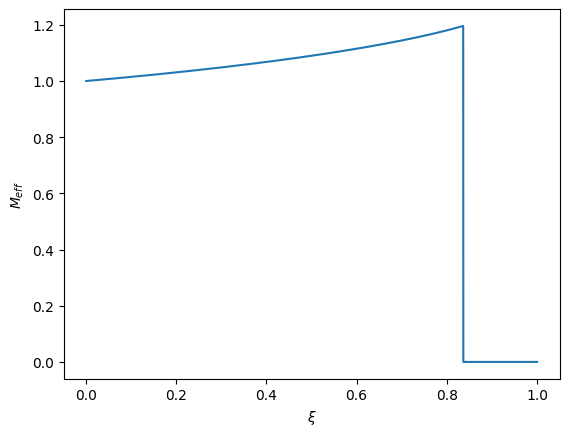

In [7]:
# example of solution for Meff
# a sharp break in the function corresponds to the crossing of the event horizon
fig, ax = plt.subplots()
plt.plot(ksi,Meff)
ax.set_xlabel(r"$\xi$")
ax.set_ylabel(r"$M_{eff}$")
plt.show()


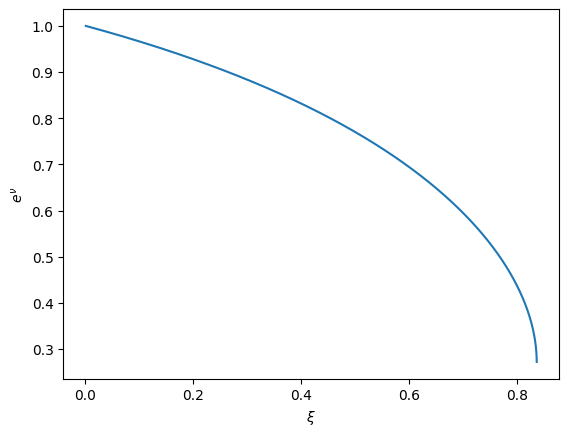

In [8]:
fig, ax = plt.subplots()
plt.plot(ksi1,expnu)
ax.set_xlabel(r"$\xi$")
ax.set_ylabel(r"$e^{\nu}$")
plt.show()

In [9]:
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! this part is about calculation of disc spectrum !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [10]:
# useful notations

def eq3(dMeff,Meff,U,dnu,nu,phi,ksi):
    return((1-ksi*dnu/2)*(-ksi*dMeff - Meff)/(ksi*(1-ksi*Meff))-(5*U**2)/(2*ksi**4*phi*(1+phi))+
            2*U/(ksi**3*(1+phi)) - 0.5*dnu**2+1/ksi*dnu)

def dnu_func(ksi,phi,Meff,nu,U):
    return(-(ksi-(U*(8*phi+3*U/ksi)/(4*phi*(1+phi))+ksi)*(1-
            ksi*Meff))/(ksi**2*(1-ksi*Meff)*(1+U/(2*ksi*(1+phi)))))

def dMeff_func(ksi,phi,Meff,dnu,U):
    return((((1-Meff*ksi)*(3*U**2/(4*phi)-2*ksi*U)+
            Meff*ksi**3*(1+phi))/(ksi**4*(1+phi+U/(2*ksi)))-Meff/ksi+(1-
            Meff*ksi)/(ksi**2*(1+phi+U/(2*ksi)))*(U*Meff/(2*(1-ksi*Meff))-U/2*dnu-
            U**2/(2*phi*ksi**2)+2*U/ksi))/(1-U/(2*ksi*(1+phi+U/(2*ksi)))))


In [11]:
# equation for last stable orbit
def equation_isco(r,E,L,gphirr,gtrr,gphir,gtr,gphi,gt):
    return(E**2*gphirr+L**2*gtrr+gtrr*gphi+2*gphir*gtr+gt*gphirr)

In [12]:
def spectr(ksi,phi,Meff,nu,U,expnu,explam):
    u = 6600

    dnu = np.zeros(u)
    dMeff = np.zeros(u)
    Veff = np.zeros(u)
    r = np.zeros(u)

    gt = np.zeros(u)
    gphi = np.zeros(u)
    gtr = np.zeros(u)
    gphir = np.zeros(u)
    gtrr = np.zeros(u)
    gphirr = np.zeros(u)

    omega = np.zeros(u)
    L = np.zeros(u)
    E = np.zeros(u)
    omegar = np.zeros(u)
    Lr = np.zeros(u)
    dMeff = np.zeros(u)
    detg = np.zeros(u)
    dMeff = np.zeros(u)

# accretion mass flow

    M0dot =  6.34e22

    for i in range(u):
        dnu[i] = dnu_func(ksi[i], phi[i], Meff[i], nu[i], U[i])
        r[i] = 1/ksi[i]*2*G*Mbh/c**2
        gt[i] = -expnu[i]*c**2
        gphi[i] = r[i]**2
        gtr[i] = -expnu[i]*c**2*dnu[i]*(c**2/(-2*G*Mbh))*ksi[i]**2
        gphir[i] = 2*r[i]
        dMeff[i] = dMeff_func(ksi[i], phi[i], Meff[i], dnu[i], U[i])
        gtrr[i] = (-expnu[i]*c**2*dnu[i]**2 - expnu[i]*c**2*eq3(dMeff[i],Meff[i],U[i],dnu[i],nu[i],phi[i],ksi[i]))*ksi[i]**4*c**4/(4*G**2*Mbh**2)
        gphirr[i] = 2
        omega[i] = sqrt(-gtr[i]/gphir[i])
        E[i] = -gt[i]/sqrt(-gt[i]-gphi[i]*omega[i]**2)
        L[i] = gphi[i]*omega[i]/sqrt(-gt[i]-gphi[i]*omega[i]**2)
        omegar[i] = 0.5*(-gtrr[i]/gphir[i]+gtr[i]*gphirr[i]/gphir[i]**2)/sqrt(-gtr[i]/gphir[i])
        Lr[i] = (gphir[i]*omega[i]/sqrt(-gt[i]-gphi[i]*omega[i]**2)+gphi[i]*omegar[i]/sqrt(-gt[i]-gphi[i]*omega[i]**2)-
                 0.5*gphi[i]*omega[i]*(-gtr[i]-gphir[i]*omega[i]**2-gphi[i]*2*omega[i]*omegar[i])/(-gt[i]-gphi[i]*omega[i]**2)**1.5)

        detg[i] = c*expnu[i]**0.5*explam[i]**0.5*r[i]**2
        Veff[i] = equation_isco(r[i],E[i],L[i],gphirr[i],gtrr[i],gphir[i],gtr[i],gphi[i],gt[i])
    
    i = 1
    integr = 0
    j=0
    riso = 0

    for i in range(u-1):
        if (Veff[i-1]<0)&(Veff[i]>0):
            riso = r[i-1]
            j = i-1
        
    i = j

    Eiso = E[j]/c

    F = np.zeros(j+1)
    r1 = np.zeros(j+1)
    zplus1 = np.zeros(j+1)



    i1 = i
    print(i)

    
    while (i1>=0):
        zplus1[i1] = c/(-gt[i1]-omega[i1]**2*gphi[i1])**0.5
        i1-=1
    
    while(i>=0):
        integr = integr + (E[i]-omega[i]*L[i])*Lr[i]*(r[i-1]-r[i])*r[i]
        F[i] = c**3*M0dot*(-omegar[i])/(4*math.pi*detg[i]*(E[i]-omega[i]*L[i])**2)*integr
        r1[i] = r[i]/(G*Mbh/c**2)
        i-=1

    return(r1, F, 1 - Eiso, riso, zplus1,omega)

1761


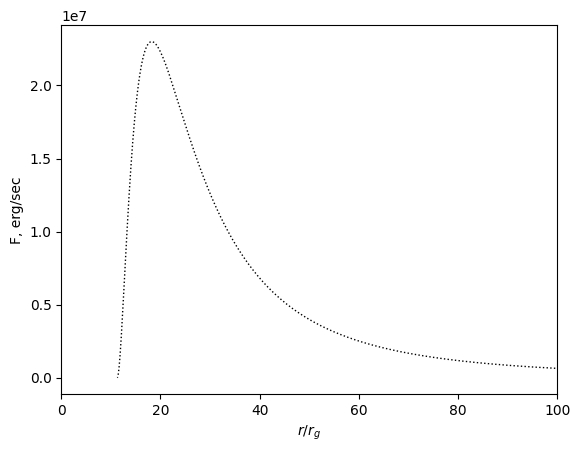

In [13]:
r1, F, eff, riso, zplus1, omega = spectr(ksi,phi,Meff,nu,U,expnu,explam)

fig, ax = plt.subplots()

plt.plot(r1, F, 'black',linestyle='dotted', linewidth=1, label='PPN')

plt.xlim(0, 100)     

ax.set_xlabel(r"$r/r_{g}$")
ax.set_ylabel(r"F, erg/sec")
plt.show()

In [14]:
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!! this part is about calculation of black hole shadow !!!!!!!!!!!!!!!!!!!!!!!!!

In [15]:
# turning point function
def turning(u,b,rg,popt1,popt2):
    u1 = u*2*rg
    return(1/b**2*func8(u1, *popt2)/func8(u1, *popt1)-u**2*func8(u1, *popt2))

In [16]:
# left part of equation for black hole shadow
def part_left(b,r,rg,r_s,ut,popt1,popt2):
    u = 0
    du = 1/r/1000
    f1 = 0
    p=1
    if (1/b**2-u**2*(1-2*rg*u))<0:
        p=0
    
    xx = np.zeros(1000)
    yy = np.zeros(1000)
    i=1
    f11 = 0
    while(i<1000)&(p!=0):
        yy[i-1] = 1/sqrt((1/b**2*func8(xx[i-1]*2*rg, *popt2)/func8(xx[i-1]*2*rg, *popt1)-xx[i-1]**2*func8(xx[i-1]*2*rg, *popt2)))
        xx[i]=xx[i-1]+du
        i+=1
    xx1 = np.zeros(1000)
    yy1 = np.zeros(1000)
    if ut==1:
        i = 1
        du = (1/r-1/r_s)/1000
        u = 1/r
        xx1[0]=1/r_s
        while(i<1000):
            yy1[i-1] = 1/sqrt((1/b**2*func8(xx1[i-1]*2*rg, *popt2)/func8(xx1[i-1]*2*rg, *popt1)-xx1[i-1]**2*func8(xx1[i-1]*2*rg, *popt2)))
            xx1[i]=xx1[i-1]+du
            u+=du
            i+=1
        f11 = scipy.integrate.simpson(yy1, x=xx1)
    f1 = scipy.integrate.simpson(yy, x=xx)
    return(f1+f11)


In [17]:
# right part of equation for black hole shadow
def part_right(phi,incl,nim):
    f2 = nim*math.pi - acos(sin(phi)*tan(incl)/sqrt(1+sin(phi)**2*tan(incl)**2))
    return(f2)

In [18]:
# function for image of accretion disc
def image(r, incl, popt1,popt2):
    x = np.zeros(5000)
    ut = np.zeros(5000)
    x[0] = 1
    i = 1
    ii = 0
    iii = 0
    jj = 0
    for jj in range(4999):
        x[i] = x[i-1] + 0.0003*r
        j = 0
        du = 1/(2*rg)/10000
        u = du
        while j<9999:
            if (turning(u,x[i-1],rg,popt1,popt2)<0)&(turning(u-du,x[i-1],rg,popt1,popt2)>0):
                ut[i-1] = u-du
                j = 10000
            u+=du
            j+=1
        if i%1000==0:
            print('i = ', i, '   ', x[i-1]/rg,'  ',1/ut[i-1]/rg)
        if (ut[i-1]>0) & (ut[i-1]>1/(r)):
            ii+=1
        if (ut[i-1]>1/(r))|(ut[i-1]<0)|(ut[i-1]==0):
            iii+=1
        if (ut[i-2]==0) & (ut[i-1]>0):
            numb = i-1
        i+=1
            
    y1 = np.zeros(iii+ii)
    x122 = np.zeros(iii+ii)
    
    i = 0
    for i in range(iii):
        y1[i] = part_left(x[i], r, rg, 0, 0,popt1,popt2)
        x122[i] = x[i]
    i = 0
    while i<ii:
        y1[ii+iii-i-1] = part_left(x[i+numb], 1/(ut[i+numb]), rg, r, 1,popt1,popt2)
        x122[iii+ii-i-1] = x[i+numb]
        i+=1
    
    phi1 = np.zeros(1000)
    y2 = np.zeros(1000)
    y22 = np.zeros(1000)
    
    j = 1    
    for j in range(1000):
        y2[j-1] = part_right(phi1[j-1], incl, 1)
        y22[j-1] = part_right(phi1[j-1], incl, 2)
        phi1[j] = phi1[j-1]+math.pi/500
    print(ii+iii)
    return(x122, phi1, y1, y2, y22, ii+iii)


i =  1000     3.3845285149633653    2.3917723032771683
i =  2000     6.772444946357981    6.3451776649743525
i =  3000     10.160361377752649    9.789525208027051
i =  4000     13.548277809148106    13.183915622939596
6884
step № 0
i =  1000     4.0074697910785275    3.3495226930165405
i =  2000     8.018951063429093    7.62195121951189
i =  3000     12.030432335780267    11.668611435238812
i =  4000     16.041913608131782    15.686274509803486
6848
step № 1
i =  1000     4.630411067193727    4.0733197556008784
i =  2000     9.265457180500272    8.884940026654482
i =  3000     13.90050329380783    13.540961408259566
i =  4000     18.535549407115408    18.181818181817746
6822
step № 2
i =  1000     5.253352343308914    4.750593824227818
i =  2000     10.511963297572551    10.141987829614239
i =  3000     15.770574251836189    15.408320493065823
i =  4000     21.029185206099825    20.682523267838256
6806
step № 3
i =  1000     5.8762936194240885    5.411255411255176
i =  2000     11.7584

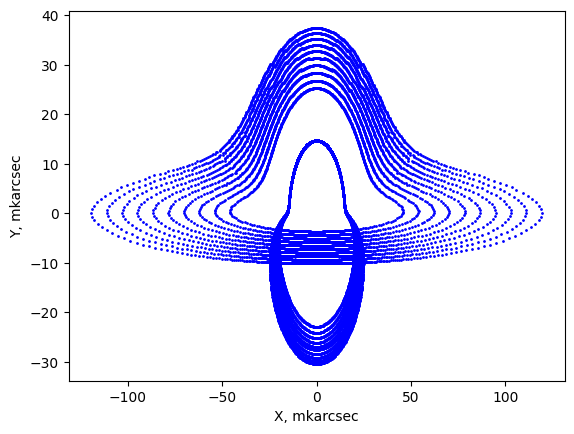

In [20]:
# Image of accretion disc plotting
fig, ax = plt.subplots()
i = 0

#for first order image
X_1 = []
Y_1 = []
Flux_1 = []
z_1 = []

# last inner stable orbit
xiso_1 = []
yiso_1 = []

xiso_2 = []
yiso_2 = []

# last orbit

xlast_1 = []
ylast_1 = []

xlast_2 = []
ylast_2 = []

#for second order image
X_2 = []
Y_2 = []
Flux_2 = []
z_2 = []

for i in range(10):
    incl = 85*math.pi/180
    dr = (30*rg-riso)/9
    r = riso+i*dr
    i_f = 1
    while (i_f<len(F)):
        if (r>=r1[i_f]*rg) & (r<=r1[i_f-1]*rg):
            i_f1 = i_f
            i_f = len(F) + 1
        i_f +=1
    x,phi,yleft,yright1,yright2,count = image(r, incl, popt1,popt2)
    print('step №', i)
    for j in range(1000):
        k = 1
        while k<count:
            if (yleft[k-1]<yright1[j-1])&(yleft[k]>yright1[j-1]):
                # first order image of last inner stable orbit
                if i==0:
                    xiso_1.append(x[k-1]*cos(phi[j-1]))
                    yiso_1.append(x[k-1]*sin(phi[j-1]))
                # first order image of last orbit
                if i==9:
                    xlast_1.append(x[k-1]*cos(phi[j-1]))
                    ylast_1.append(x[k-1]*sin(phi[j-1]))
                X_1.append(x[k-1]*cos(phi[j-1]))
                Y_1.append(x[k-1]*sin(phi[j-1]))
                Flux_1.append(F[i_f1]/((1+omega[i_f1]/c*x[k-1]*sin(incl)*cos(math.pi/500*j))*zplus1[i_f1])**4)
                z_1.append(((1+omega[i_f1]/c*x[k-1]*sin(incl)*cos(math.pi/500*j))*zplus1[i_f1]))
                plt.scatter((x[k-1])*cos(phi[j-1])/D*206265*1e6, (x[k-1])*sin(phi[j-1])/D*206265*1e6, c = 'blue', s = 1)
                k = count
            k+=1
        k = 1
        while k<count:
            if (yleft[k-1]<yright2[j-1])&(yleft[k]>yright2[j-1]):
                # second order image of last inner stable orbit
                if i==0:
                    xiso_2.append(x[k-1]*cos(phi[j-1]))
                    yiso_2.append(x[k-1]*sin(phi[j-1]))
                # second order image of last orbit
                if i==9:
                    xlast_2.append(x[k-1]*cos(phi[j-1]))
                    ylast_2.append(x[k-1]*sin(phi[j-1]))
                
                X_2.append(x[k-1]*cos(phi[j-1]))
                Y_2.append(x[k-1]*sin(phi[j-1]))
                Flux_2.append(F[i_f1]/((1+omega[i_f1]/c*x[k-1]*sin(incl)*cos(math.pi/500*j))*zplus1[i_f1])**4)
                z_2.append(((1+omega[i_f1]/c*x[k-1]*sin(incl)*cos(math.pi/500*j))*zplus1[i_f1]))
                plt.scatter((x[k-1])*cos(phi[j-1])/D*206265*1e6, (x[k-1])*sin(phi[j-1])/D*206265*1e6, c = 'blue', s = 1)
                k = count
            k+=1
    
    np.save('x_iso2_05_new85.npy', xiso_2)
    np.save('y_iso2_05_new85.npy', yiso_2)
    
    np.save('x_iso_05_new85.npy', xiso_1)
    np.save('y_iso_05_new85.npy', yiso_1)
    np.save('x_last_05_new85.npy', xlast_1)
    np.save('y_last_05_new85.npy', ylast_1)
# first order image
    np.save('x_05_1_new85.npy', X_1)
    np.save('y_05_1_new85.npy', Y_1)
    np.save('z_05_1_new85.npy', z_1)
    np.save('F_05_1_new85.npy', Flux_1)
# second order image
    np.save('x_05_2_new85.npy', X_2)
    np.save('y_05_2_new85.npy', Y_2)
    np.save('z_05_2_new85.npy', z_2)
    np.save('F_05_2_new85.npy', Flux_2)
    
    
ax.set_xlabel(r"X, mkarcsec")
ax.set_ylabel(r"Y, mkarcsec")
plt.show()

# Here we are also plotting images of orbits